In [35]:
#import important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from prettytable import PrettyTable
import math


In [36]:
#read dataset csv file.
df = pd.read_csv('50_Startups.csv')

In [37]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [39]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [40]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [41]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [42]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

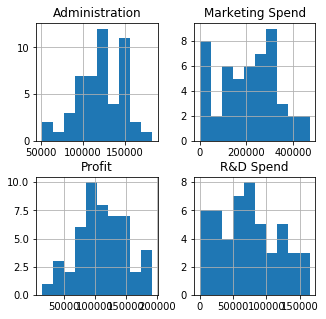

In [43]:
df.hist(figsize=(5,5))
plt.show()

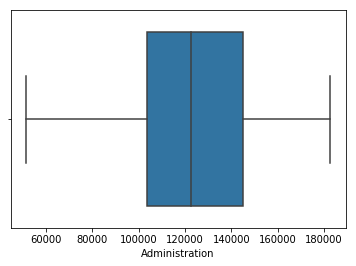

In [44]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['Administration'])

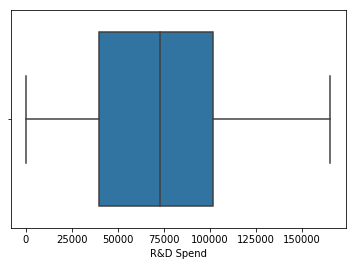

In [45]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['R&D Spend'])

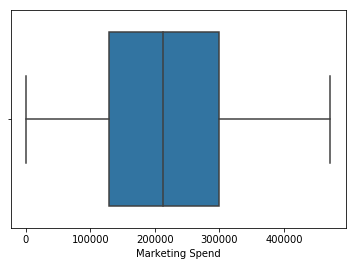

In [46]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['Marketing Spend'])

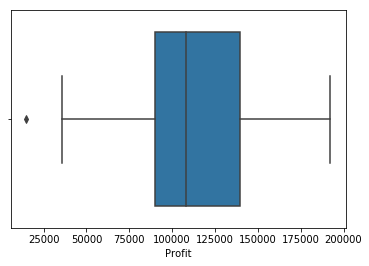

In [47]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['Profit'])

In [48]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 4].values
X1 = df.iloc[:, :-1]

In [49]:
# Encoding Categorical Data
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
Y = df.iloc[:, -1:]

In [50]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


In [51]:
#Using sklearn linear regression model

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        X, Y, test_size=0.25,random_state=42)
    
    
algorithms = {'LinearRegression()':'LinearRegression', 'linear_model.Lasso(alpha=0.1)' : 'Lasso LinearRegression', 
              'LassoCV()' : 'LassoCV LinearRegression', 'DecisionTreeRegressor()': 'DecisionTree', 'SVR()':'SVR'}
acc_train_test = []
r2_train_test = []
results =  {}
for key, value in algorithms.items():
        model = eval(key)
        reg = model.fit(x_data_train,y_data_train)            
        y_pred_train =  reg.predict(x_data_train)
        y_pred_test =  reg.predict(x_data_test)
        
        r2_train_test.append([value, (r2_score(y_data_train,y_pred_train),r2_score(y_data_test,y_pred_test)), 
                              (reg.score(x_data_train,y_data_train), reg.score(x_data_test,y_data_test))])
results.update({"data": r2_train_test})        
x = PrettyTable()
x.field_names = ["Algorithm", "R2Score (Train/Test)", "Accuracy (Train/Test)"]
r2score = results['data']
for val in range(0 , len(r2score)):
    r2_value = str(math.floor(r2score[val][2][0]*100)) + '/' + str(math.floor(r2score[val][2][1]*100))
    acc_value = str(math.floor(r2score[val][1][0]*100)) + '/' + str(math.floor(r2score[val][1][1]*100))
    x.add_row([r2score[val][0], r2_value, acc_value])
print(x)

+--------------------------+----------------------+-----------------------+
|        Algorithm         | R2Score (Train/Test) | Accuracy (Train/Test) |
+--------------------------+----------------------+-----------------------+
|     LinearRegression     |        95/91         |         95/91         |
|  Lasso LinearRegression  |        95/91         |         95/91         |
| LassoCV LinearRegression |        95/92         |         95/92         |
|       DecisionTree       |        100/73        |         100/73        |
|           SVR            |        -2/-1         |         -2/-1         |
+--------------------------+----------------------+-----------------------+
